# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

k-means algoritmasinda kullandigimiz iris datasetini Hierarchial Clustering' de de kullanacagiz :

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Gorselde 2 kumenin birbirinden net bir sekilde ayrildigini goruyoruz. Daha fazla kume sayisi varsa pairplot ile bunun tespiti zor fakat bu kumeden birinin net bir sekilde ayrildigini ve kume ici varyansin dusuk oldugunu; digerinin ise genis ir alana yayildigini ve varyansin yuksek oldugunu goruyoruz. Varyansi yuksek olan kumeden baska bir kume daha cikabilir :

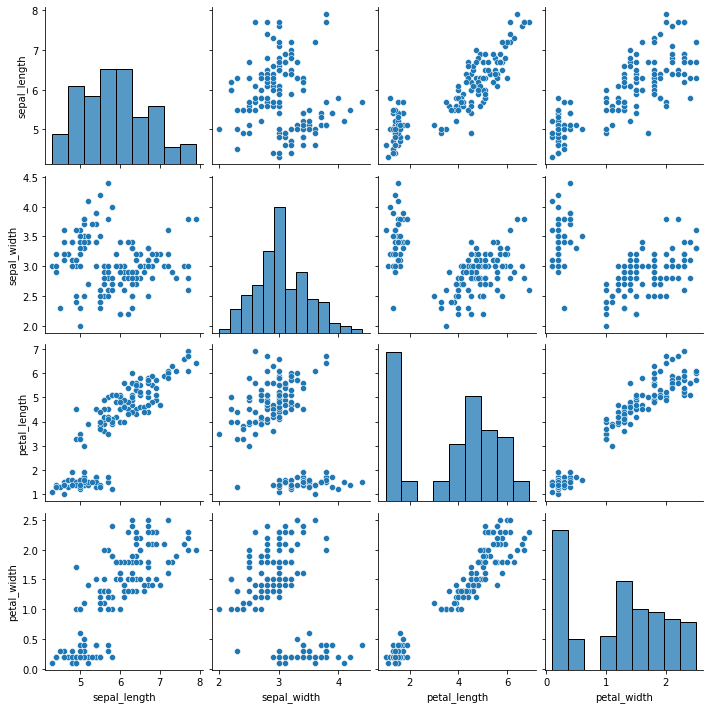

In [6]:
sns.pairplot(df);

## Scaling Data

**The K-means algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

K-means algoritmasinda oldugu gibi scale islemi yapmayacagiz. Cunku data zaten scale edilmis gibi. Yine de scale islemi yapilip hangisinin sonuclari daha iyi gorulebilir.

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [7]:
#!pip install pyclustertend

In [8]:
from pyclustertend import hopkins

In [9]:
X = df.copy()

Hopkins test icinde ilk kisma datanin kendisi, ikinci kisma sampling_size verilir. Cok buyuk datalarda Hopkins test yavas calisacagi icin icine belli bir gozlem sayisi verilebilir.

In [10]:
hopkins(X, X.shape[0])   

0.16847390567991735

Hopkins test skoru 0 ile 0.5 arasinda ise clusturing icin uygundur, random bir dagilim var demektir. 0.5' ten sonra uniform dagilima dogru gider ve clustering zorlasir.

## Dendrogram

K-means Algoritmasi gibi clustering icin kullanilan bir algoritmadir. Once bir dendogram cizer, bu dendogramdaki cluster' lar arasi mesafeye gore datanin kac cluster' a ayrilmasi gerektigine karar verir.

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


### __PARAMETERS__

Z -----> Dendogram icine datanin kendisi ile birlikte hangi metodu kullanacigini da ister. Cluster secimini hangi metod ile yapacagini belirtmemiz gerekir. Datayi dendograma metoduyla birlikte vermek icin de __linkage__ fonksiyonu kullanilir.  

__*LINKAGE__ -----> Datanin hangi cluster' a gidecegini belirler. (Cluster' lar arasi veya ici varyansi olcen parametreleri var.) 

Linkage icine sirasiyla; data, method (default='single'), metric (default='euclidean') parametrelerini alir.

__ward__ --> Kumelerin varyansinin en az olmasini saglayacak sekilde calisir. Datayi hangi cluster' a eklediginde varyans en az olacaksa datayi ona ekler. Bir data iki kumeye de ayni uzakliktaysa, varyansi zaten dusuk olan bir kumenin kalitesini bozmak istemez, bu datayi varyansi yuksek olan kumeye atmayi tercih eder. Hedefi varyansi dusuk tutmaktir. (Linkage icin default deger 'ward')

__complete__ -->  Cluster' larin en uzak noktasini bulur. Bu en uzak noktalardan en yakini hangisi ise datayi o cluster' a atar.

__average__ -->  Datanin her bir cluster elemanina olan uzakliklarini olcer ve ortalama alir. Bu ortalama deger hangi cluster' da en kucukse datayi ona atar.

__single__ --> Datanin cluster' larin en yakin elemanina olan uzakliklarini olcer; en yakin olan cluster' a atama islemini yapar. 

__*p__ --> min su kadar kumeyi goster. (Dendogramdaki goruntu karisikligini onlemek icin) (Default=30)

__*truncate_mode__ --> Eger bir p degeri giriyorsak bunu da default deger yerine 'lastp' olarak degistirmemiz gerekir. (Sondaki belirttigim kadar sayida p' yi goster) (Default=None)

__*AFFINITY__ --> Gozlemlerin birbirine olan uzakligini olcen parametre. (Default='euclidean')

!!!! __'euclidean'__ sadece __'ward'__ ile kullanilir. !!!!

In [13]:
hc_ward = linkage(y = X, method = "ward")  # Datayi hangi kumeye atarsan varyans en en dusuk olacaksa o kumeye at.
hc_complete = linkage(X, "complete")       # Kumelerdeki en uzak noktalari bul, bunlar icinde en yakin olana atama yap.
hc_average = linkage(X, "average")         # Datanin kumenin her elemanina olan uzakliklarinin ortalamasini al, en az olan kumeye ata ata.
hc_single = linkage(X, "single")           # Kume elemanlarinin dataya en yakin noktasini olc, dataya en yakin olana atama yap.

__hc_ward__ --> Yukarida varyansa gore olcen parametreyi sectik. Buna gore cluster islemi asagida yapildi. y ekseni bize cluster' lar arasi mesafeyi veriyor. y eksenine gore mesafesi en uzak olan cluster' lara gore k sayisi belirleyecegiz. Asagida en uzak mesafelere gore k=2 olur. Dendogram karar verdigi cizgiyi mavi ile cizer. Burada, en iyi kumelenmenin 2 class ile olacagina karar vermis. 

K-means algoritmasinda oldugu gibi kumelerin kendi icinde ne kadar yogun olarak kumelendigini olcen bir inertia degeri bu algoritmada yok. Burada kumeler arasi mesafeye gore bir karar verilir. Bu yuzden dendogram ile alinan kumeleme kalitesi k-mean' den daha dusuk olabilir. 

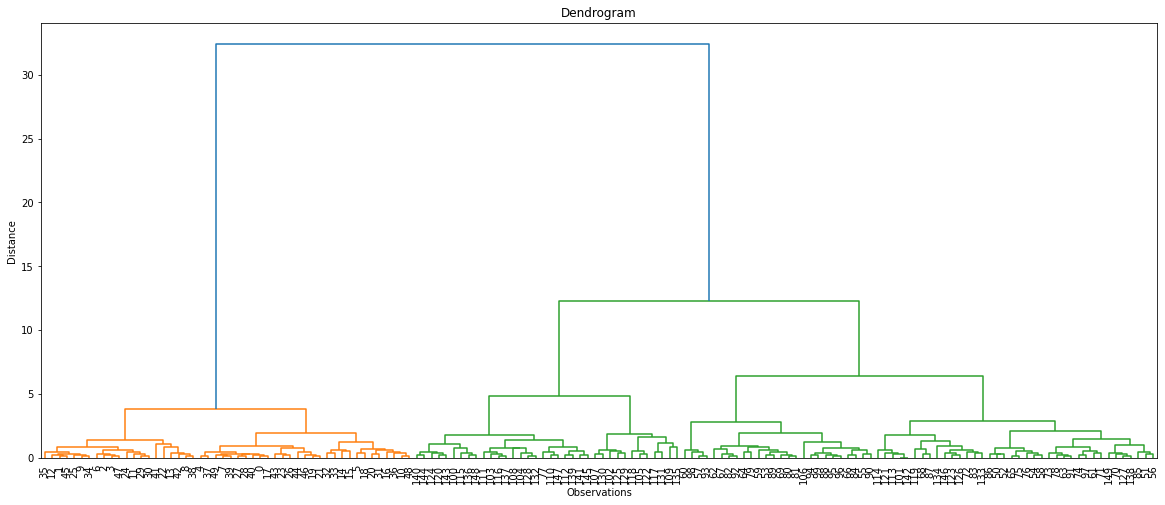

In [14]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);   

Yukaridaki gorselde dendogram bize 2 cluster olmasi gerektigini soyledi fakat biz 3 degerini secersek de en alttaki 3 kumenin de birbirinden guzel ayristigini gorebiliyoruz.'3 degerini secersek de kaliteli bir clustering olabilir.' cikarimini da gorsele bakarak yapabiliriz. 

Yukarida linkage icindeki tum parametrelere gore degiskenler belirlemistik. Bunlarin hepsine gore dendogramlarimizi cizdirelim. Butun parametreler bize 2 cluster olmasi gerektigini soyluyor. y eksenlerine baktigimzda distance en fazla 'ward' da; en dusuk ise single' da. Default deger olan ward' in digerlerine gore cok daha kaliteli bir kumeleme yaptigini goruyoruz :

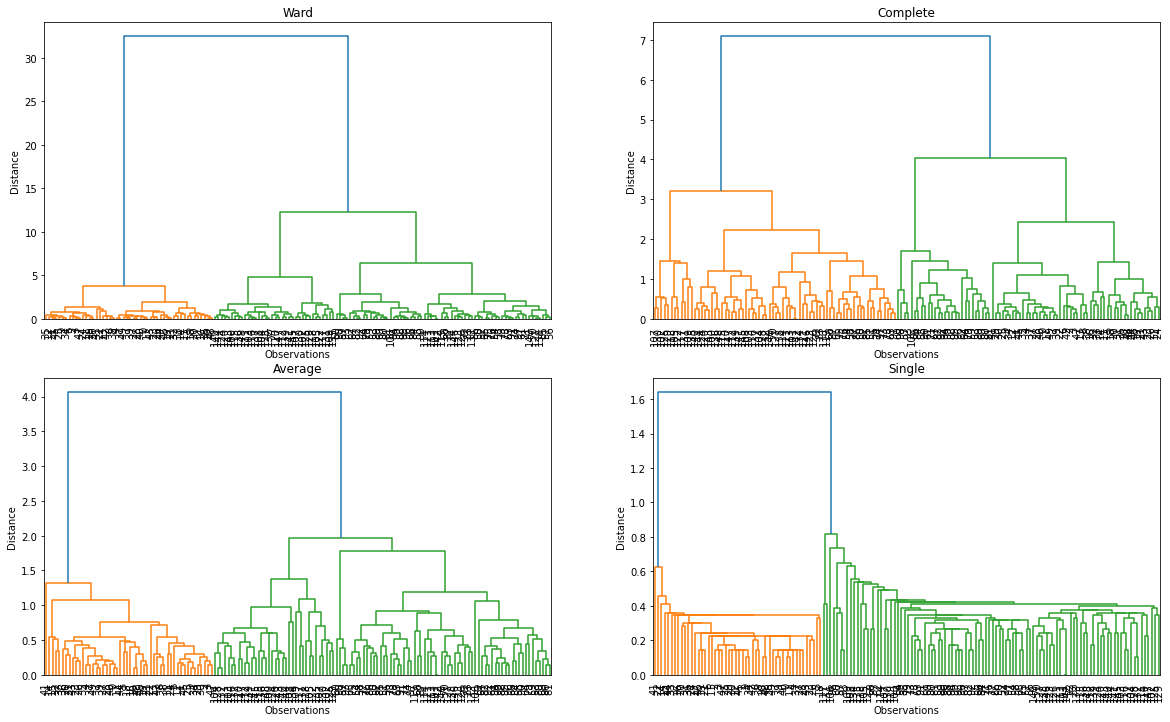

In [15]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

Yukarida feaute sayisinin cok olmasindan dolayi karisik bir goruntu olustu. Cok daha buyuk datalarda bu goruntu karisikliga sebep olacaktir. Bu yuzden asagida bazi hyperparametreler ile oynayacagiz. 

p=10 yaparak yukaridaki son 10 dallanmayi goster diyerek bir kirpma islemi yapmis olduk. Boylece gorselimiz daha sade bir hal aldi. Asagidaki tum dendogramlarda kalan observation sayisinin 10 oldugunu gorebiliriz.  :

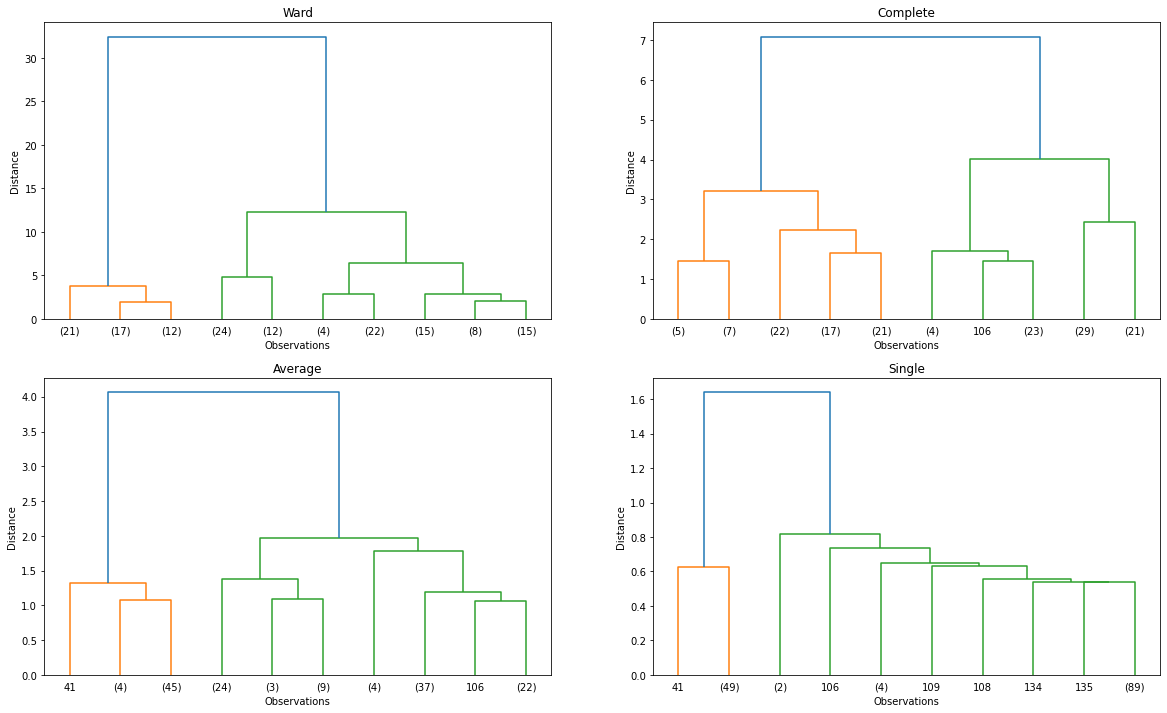

In [16]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

## Hierarchical Clustering (Agglomerative)

Tumevarim mantigi ile islem yapar. En alttaki observation' larin hepsini birer cluster olarak kabul eder ve bunlari en yakinlarindaki gozlem ile birlestirerek yeni bir orta nokta belirler. Bu sekilde yukariya kadar datalari birlestirir ve en son datanin tamamina ulasir.

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [17]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

Bu algoritmada kumelenme kalitesini olcen bir inertia degeri olmadigi icin kume icindeki datalarin birbirleri ile ne kadar siki bir iliski icinde olduklarini olcemiyoruz. Bu yuzden Silhouette Score' dan destek alacagiz :

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.6867350732769781
Silhouette Score for 3 clusters: 0.5543236611296426
Silhouette Score for 4 clusters: 0.48896708575546993
Silhouette Score for 5 clusters: 0.48438258927906036
Silhouette Score for 6 clusters: 0.359237619260309
Silhouette Score for 7 clusters: 0.34220719366205077
Silhouette Score for 8 clusters: 0.3435906599119544
Silhouette Score for 9 clusters: 0.3304886352874667


Silhouette Score' u bize bariz bir sekilde datayi 2 cluster' a bolmemiz gerektigini soyluyor. Eger bir uzman destegimiz yoksa bu skorlara gore sececegimiz deger 2 olmali. K-means algoritmasi da cluster degerini 2 olarak bulmustu fakat orada 2 cluster' da da inertia degerinin (kume ici elemanlarin merkeze olan uzakligi) cok yuksek oldugu bilgisini bize vermisti. Burada bu bilgiyi saglayacak bir skor olmadigi icin hem dendogram hem de Silhouette Score sonuclarina guvenerek cluster=2 olarak kabul ediyoruz. Simdiye kadarki gozlemlerimizde cluster sayisini 3 secersek de kaliteli sonuclar alma ihtimalimiz oldugunu gozlemledik.

Uzmandan destek aldigimizi ve bu data icin 3 cluster oldugu bilgisini aldigimizi farzederek cluster=3 olarak kabul edip modelimizi kuruyoruz. affinity ve linkage parametrelerini degistirmek cok fazla onerilmez fakat datada cok fazla outlier var ise __complete__ denenebilir :

In [20]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

K-means algoritmasinda fit predict' ten ayri kullanilabiliyordu. Fakat burada ayri ayri kullanilmaz, hata verir.

sklearn kaynaklarinda __fit_predict__ islemi; "cluster' larin merkez noktalarinin hesaplanmasi" olarak gecer. Bu yuzden unsupervised algoritmalarinda ikisinin birlikte kullanilmalari tavsiye edilir. Hierarchical Clustering' de ise istense bile ayri ayri kullanilamazlar. 

In [21]:
model1.labels_     # Yukaridaki sonuclarin aynisini dondurur. 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

Asagida 2 feature' i gorsellestirdik. __Agglomerative__ 'in diger bir negatif yonu; K-means algoritmasindaki gibi cluster merkezlerini belirleyemiyoruz : 

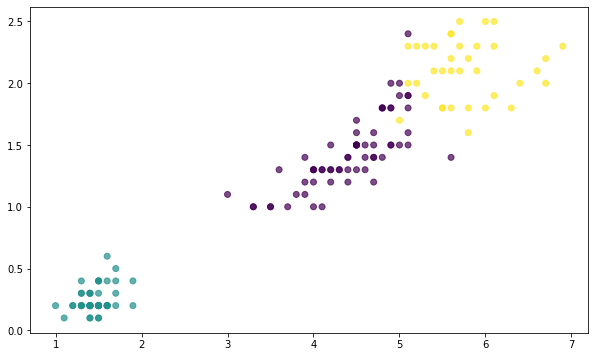

In [22]:
plt.scatter(X["petal_length"], X["petal_width"], c = model1.labels_, cmap = "viridis", alpha =0.7)

Olusturdugumuz 3 cluster' a gore tahminlerimizi almistik (model1.labels_). Bunlari bir degiskene atadik. Uzmandan aldigimiz labelleri da bir degiskene atadik. Asagida bu iki bilgiyi feature olarak datamizin sonuna ekledik :

In [23]:
clusters = model1.labels_

In [24]:
labels = pd.read_csv("label.csv")
labels

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [25]:
X["predicted_clusters"] = clusters
X["labels"] = labels
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Crosstab islemi ile kendi degerlerimiz ile uzmandan gelen degerleri kiyasladik. Aldigimiz sonuclar K-means algoritmasindan aldigimiz sonuclar ile hemen hemen ayni cikti. Orada da 16 hata yapmistik, burada da 16 hata yaptik. Kumeleme kalitesinde herhangi bir sikinti yok. Sadece hatalarin yerleri degismis. Fakat bu algoritmada karsilastirma metrikleri az oldugu icin uzman birinden bilgi almadigimiz surece imkanlarimiz kisitlidir. 

In [26]:
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


Model burada 0 class' i icin fazla tahminleme, 2 class' i icin de eksik tahminleme yapmis.

## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

R2 skoru da K-means' de aldigimiz skora cok yakin cikti. (R2 skoru Accuracy skoru gibidir fakat yapilan hatalar uzerinden cezalandirma yapmasi Accuracy score' a gore daha dusuk bir skor almamiza sebep olur) :

In [28]:
adjusted_rand_score(X.labels, X.predicted_clusters)

0.7311985567707746

## Visualization Clusters

Visualization islemi icin str olan class isimlerimizi numeric hale cevirdik :

In [29]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

__c = X_labels__ ---> Renklendirmeyi kac farkli kategoriye gore yapayim?

Hem gercek degerler olan X_labels hem de tahmin degerlerimiz olan X.predicted_clusters' a gore 2 feature' a ait gorsellestirme islemini yaptik :

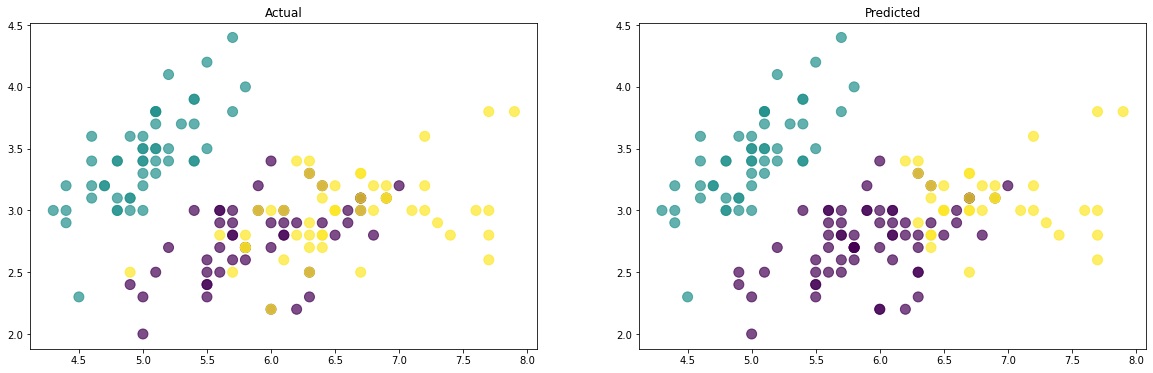

In [30]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

Actual kisimda mor ve sari datalarin ic ice gectigini, bu datalarin predicted kisminda yanlis class' a atandigini goruyoruz. K-means' de oldugu gibi grift kisimlari ayirmada Agglomerative de yetersiz kaldi. 

Baska 2 feature secerek geercek ve tahmin degerlere baktik. Yine grift olan kisimlar oldugunu ve algoritmanin bunlari ayirmada yetersiz kaldigini goruyoruz :

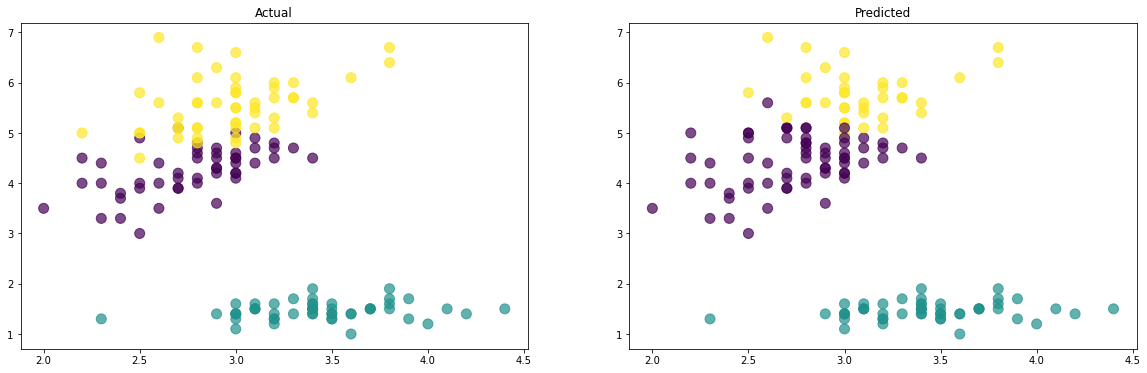

In [31]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

In [32]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


Elimizde uzmandan gelen gercek degerler oldugu icin bunun uzerinden gruplandirma yaparak ortalama degerlerimize baktik. Elimizde cogu zaman musteriden gelen veriler olmayacagi icin, oyle durumlarda degerlerimize predicted_clusters uzerinden bakmamiz gerekir. K-means algoritmasinda predicted label' i kullanmistik.

Mean degerlere gore en iyi ayrimin petal_length ve petal_width' te oldugunu goruyoruz :

In [33]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred

labels,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


Yukarida elde ettigimiz degerleri asagida gorsele aktardir ve sonuc olarak K-means' de aldigimiz degerlere yakin degerler elde ettik. En iyi ayrisimi yapan feature' larin petal_length ve petal_width oldugunu goruyoruz :

<AxesSubplot:>

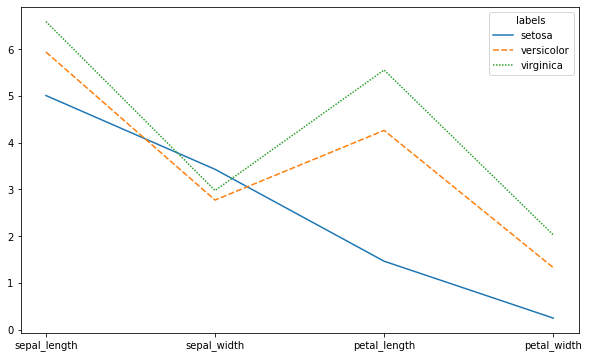

In [34]:
sns.lineplot(data = clus_pred)

Asagida boxplot' a gore butun feature' larin tek tek labels ile olan iliskisine baktik ki birbirine grift durumda olan degerler var mi :

<AxesSubplot:xlabel='labels', ylabel='petal_width'>

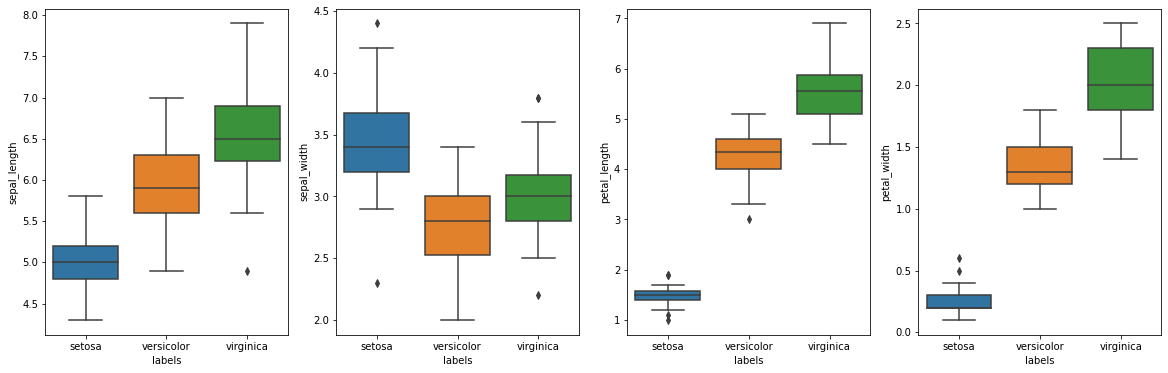

In [35]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X)

plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X)

plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X)

plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X)

sepal_length' te class' lara gore iyi bir ayrim olmus. Whiskers' larda az cok grift bir durum var fakat datalarin yogun toplandigi bolgelerde cok fazla grift bir durum yok. 

sepal_width' te datalarin yogun oldugu bolgelerde verscolor ve virginica turlerinin birbirine grift oldugunu soyleyebiliriz. 

petal_length ve petal_width' te datalarin yogun oldugu bolgelerede class' lara gore cok iyi bir ayrisim olmus. Bu iki feature kullanilarak bir model kurmamiz gerektigini anladik. Dendogram' da inertia gibi yardimci degerler olmasa da boxplot' a bakarak boyle bir inside saglayabiliriz.

Sadece petal_length ve petal_width feature' larini alarak yeniden modelimizi kuracagiz.

In [36]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Hopkins Test

2 feature secerek aldigimiz Hopkins test skoru dustu. Iyi bir clustering islemi yapabilecegimizi anladik :

In [37]:
hopkins(X2, X2.shape[0])

0.09174169939648821

### Dendrogram

Tekrar butun metodlar icin degiskenlerimizi tanimladik. Bu sefer data olarak X2' yi kullaniyoruz :

In [38]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

Dendogram cluster sayisi olarak hala 2' yi secmemiz gerektigini soyluyor. Asagida bir de Silhouette Score' a bakacagiz :

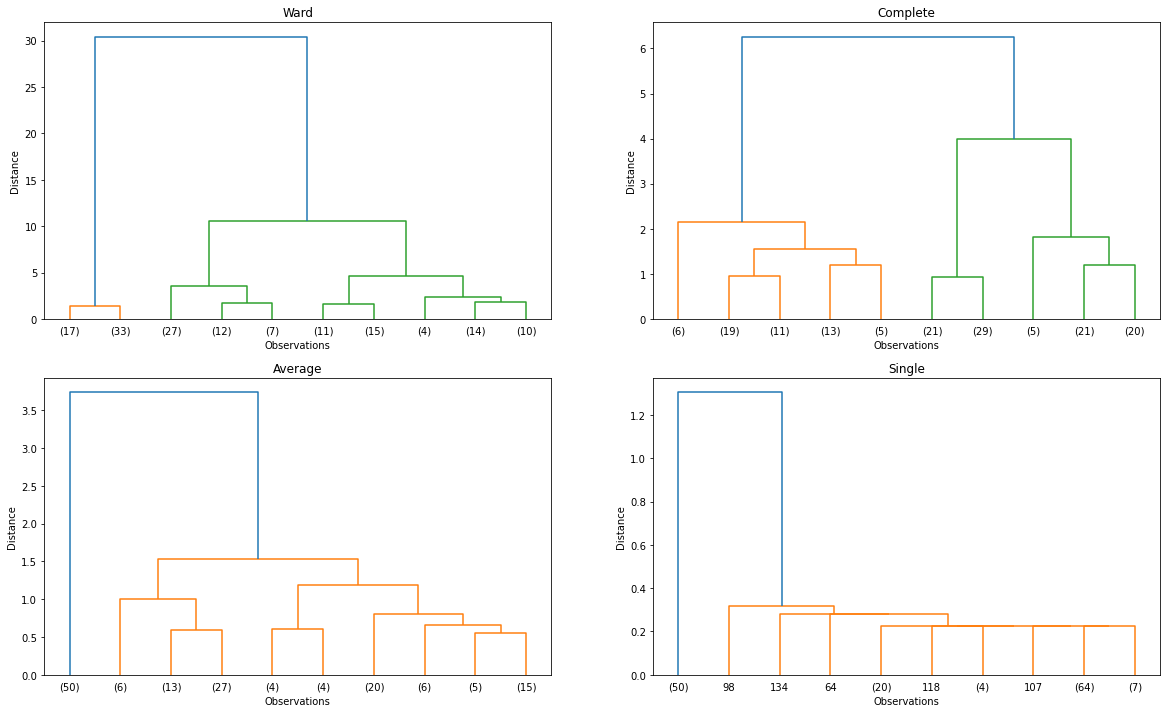

In [39]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

Silhouette Score' da en yuksek skorun cluster=2' nin oldugunu soyluyor fakat yukaridaki skorlara bakarsak cluster=3' un skorlarinin cok daha fazla artis gosterdigini goruyoruz. Yine de burada yaptigimiz yorumlar kesin yorumlar degil, bir uzman destegine ihtiyac var :

In [40]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622770762
Silhouette Score for 3 clusters: 0.6573949269287823
Silhouette Score for 4 clusters: 0.5895284480910935
Silhouette Score for 5 clusters: 0.5781917218437669
Silhouette Score for 6 clusters: 0.5747380906148477
Silhouette Score for 7 clusters: 0.5830818097709548
Silhouette Score for 8 clusters: 0.5678904784921739
Silhouette Score for 9 clusters: 0.5469910001848306


## Final model

Cluster=3 secerek ve en iyi parametrelerimizi tanimlayarak X2 datasina gore modelimizi tekrar olusturduk. Musteriden gelen labellari da ekledik :

In [41]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(X2)

In [42]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,2,setosa
1,1.4,0.2,2,setosa
2,1.3,0.2,2,setosa
3,1.5,0.2,2,setosa
4,1.4,0.2,2,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


Musteriden gelen labellara gore Crostab islemi yaptigimizda hatanin 6' ya dustugunu goruyoruz :

In [43]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,0,45,1
2,50,0,0


In [44]:
ct  # Daha once butun feature' lar ile aldigimiz crosstab skorlari.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


Gorsellestirme icin str olan class isimlerimizi tekrar numeric hale cevirdik :

In [45]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

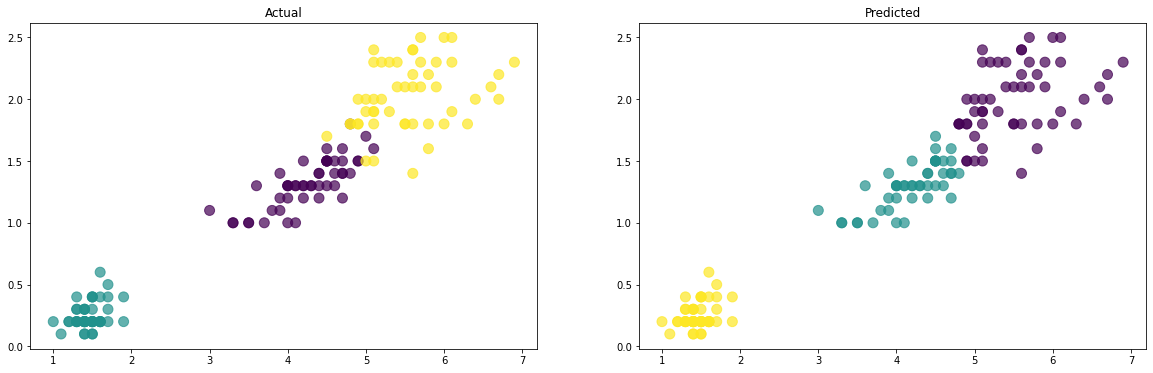

In [46]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

Actual ve predicted grafiklerine baktigimizda, grift olan kisimlarda hala hatalar yapildigini goruyoruz. 

### ARI Score

2 feature ile R2 skorumuzun da arttigini goruyoruz : 

In [47]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8857921001989628

## Prediction cluster of new data

Olusturdugumuz model icin iki tane gozlem iceren bir data olusturduk. Fakat bu datayi modele verdigimizde asagidaki gibi hata aliyoruz. Agglomerative Clustering algoritmasinin predict ozelligi yoktur. Prediction yapilamamasi bu modelin en kotu ozelliklerinden biridir. Modele tahmin yaptirabilmenin yolu; dataya bu gozlemleri eklemek ve modeli yeniden olusturarak bu datalarin hangi class' a ait olduklarini o sekilde gormek olabilir. Bu da zor bir islem oldugu icin genelde K-means Algoritmasi tercih edilir.

In [48]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [49]:
final_model.predict(new_data)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'